In [109]:
import time
import pandas as pd
import numpy as np
import ccxt
from binance.client import Client
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [47]:
api_key = 'dNC0absMhm1yaOQ5dlG9xQabyqIzpNdJo9PJ6l7snb7O17DVWWPtHvQ5GUpgm0Tq'
api_secret = 'Xs5Lo26gAAJrAN6Lg4FS9KBkJvKl7zjMP5JRxwTs9IKt1drdLopug6TS8h1asuc9'
fred = Fred(api_key='6b34fb85580e1c681b410ee8b6ee8e9f ')
CCXT_TICKER_NAME = 'BTC/USDT'
TRADING_TICKER_NAME = 'btcusdt'
CANDLE_DURATION_IN_MIN = 5
exchange = ccxt.binance()
client = Client(api_key, api_secret)

In [48]:
def fetch_data(ticker):
    global exchange
    bars, ticker_df = None, None

    try:
        bars = exchange.fetch_ohlcv(ticker, timeframe=f'{CANDLE_DURATION_IN_MIN}m', limit=1000)
    except:
        print(f"Error in fetching data from the exchange:{ticker}")

    if bars is not None:
        ticker_df = pd.DataFrame(bars[:-1], columns=['date', 'open', 'high', 'low', 'close', 'volume'])
        ticker_df['date'] = pd.to_datetime(ticker_df['date'], unit='ms')
        ticker_df['symbol'] = ticker

    return ticker_df

In [49]:
df = fetch_data(CCXT_TICKER_NAME)
df.set_index("date", inplace=True)
df.sort_index(inplace=True)
df

,open,high,low,close,volume,symbol
date,,,,,,
2023-04-16 00:00:00,30295.10,30295.10,30288.47,30291.67,55.81881,BTC/USDT
2023-04-16 00:05:00,30291.68,30304.84,30291.67,30304.84,58.53284,BTC/USDT
2023-04-16 00:10:00,30304.84,30309.37,30278.17,30278.18,67.25581,BTC/USDT
2023-04-16 00:15:00,30278.18,30304.96,30277.61,30304.95,51.03979,BTC/USDT
2023-04-16 00:20:00,30304.95,30315.23,30289.95,30289.95,48.95771,BTC/USDT
...,...,...,...,...,...,...
2023-04-19 10:50:00,29130.63,29234.67,29130.18,29230.00,584.61974,BTC/USDT
2023-04-19 10:55:00,29230.00,29286.64,29230.00,29257.26,376.01520,BTC/USDT
2023-04-19 11:00:00,29257.26,29276.60,29240.00,29259.66,302.83712,BTC/USDT


In [84]:
# Calculate RSI
delta = df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

In [85]:
df

,open,high,low,close,volume,symbol,rsi
date,,,,,,,
2023-04-16 00:00:00,30295.10,30295.10,30288.47,30291.67,55.81881,BTC/USDT,NaN
2023-04-16 00:05:00,30291.68,30304.84,30291.67,30304.84,58.53284,BTC/USDT,NaN
2023-04-16 00:10:00,30304.84,30309.37,30278.17,30278.18,67.25581,BTC/USDT,NaN
2023-04-16 00:15:00,30278.18,30304.96,30277.61,30304.95,51.03979,BTC/USDT,NaN
2023-04-16 00:20:00,30304.95,30315.23,30289.95,30289.95,48.95771,BTC/USDT,NaN
...,...,...,...,...,...,...,...
2023-04-19 10:50:00,29130.63,29234.67,29130.18,29230.00,584.61974,BTC/USDT,45.746645
2023-04-19 10:55:00,29230.00,29286.64,29230.00,29257.26,376.01520,BTC/USDT,51.161190
2023-04-19 11:00:00,29257.26,29276.60,29240.00,29259.66,302.83712,BTC/USDT,55.645046


In [107]:
df_drop = df.dropna(axis=0)
df_drop.drop(["symbol"], axis=1, inplace=True)
df_drop

C:\Users\Asus\AppData\Local\Temp\ipykernel_15284\3874076511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop.drop(["symbol"], axis=1, inplace=True)


,open,high,low,close,volume,rsi
date,,,,,,
2023-04-16 01:05:00,30263.88,30263.89,30249.44,30252.58,52.75973,40.273700
2023-04-16 01:10:00,30252.58,30252.59,30120.00,30173.36,432.47831,28.886033
2023-04-16 01:15:00,30173.35,30191.74,30120.00,30184.11,222.58797,28.266427
2023-04-16 01:20:00,30184.11,30222.71,30183.11,30209.41,127.33745,37.559246
2023-04-16 01:25:00,30209.41,30235.08,30200.00,30229.45,94.66199,36.000890
...,...,...,...,...,...,...
2023-04-19 10:50:00,29130.63,29234.67,29130.18,29230.00,584.61974,45.746645
2023-04-19 10:55:00,29230.00,29286.64,29230.00,29257.26,376.01520,51.161190
2023-04-19 11:00:00,29257.26,29276.60,29240.00,29259.66,302.83712,55.645046


In [110]:
train, test = train_test_split(df_drop, test_size=0.2, shuffle=False)

In [112]:
model = sm.tsa.statespace.SARIMAX(train['close'], exog=train['rsi'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

C:\Users\Asus\anaconda3\envs\bot\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\envs\bot\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


In [113]:
model_fit = model.fit()

In [114]:
y_pred = model_fit.forecast(steps=len(test), exog=test['rsi'])

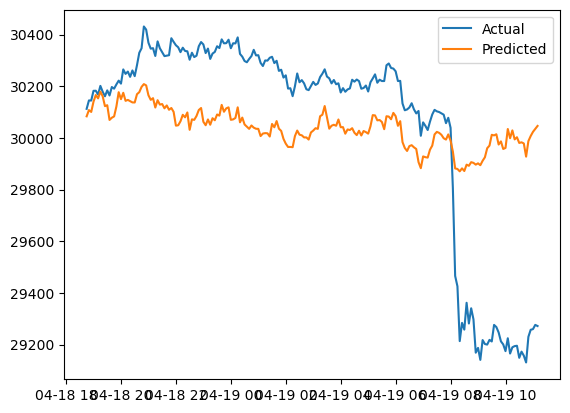

In [115]:
# Plot the actual and predicted values
plt.plot(test.index, test['close'], label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()
plt.show()